1 VGG16的复现


VGG16的架构
用语言来表示则有：
输入→（卷积x2+池化）x2 →（卷积x3+池化）x3 → FC层x3 →输出
其中每组卷积+池化算一个block。同时，架构图中没有显示出来的内容包括：
1、除了输出层外，所有的激活函数都是ReLU函数 赋范空间
2、最后三个全连接层中的前两个全连接层前有Dropout层，p=0.5
为了在卷积层中保持特征图尺寸不变，卷积层的padding、步长是灵魂。

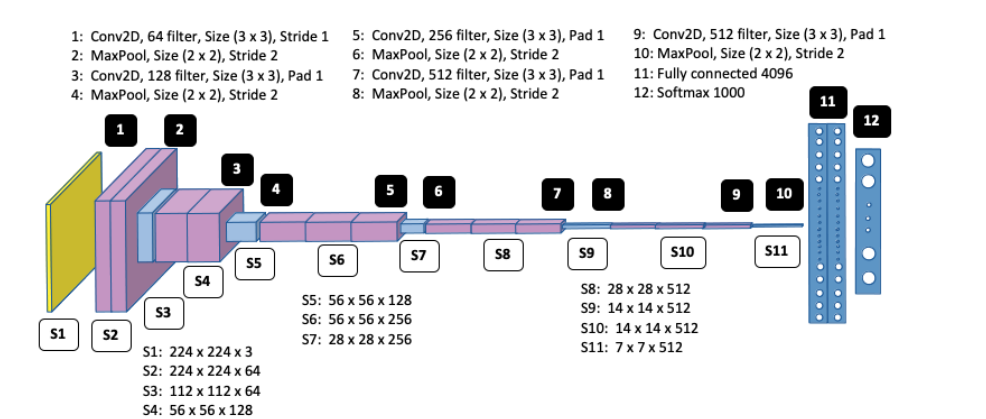

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torchinfo import summary

class VGG16(nn.Module):
    def __init__(self):
        super().__init__()
        
        # block1
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        
        # block2
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        
        # block3
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv7 = nn.Conv2d(256, 256, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2)
        
        # block4
        self.conv8 = nn.Conv2d(256, 512, 3, padding=1)
        self.conv9 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv10 = nn.Conv2d(512, 512, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2)        
        
        # block5
        self.conv11 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv12 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv13 = nn.Conv2d(512, 512, 3, padding=1)
        self.pool5 = nn.MaxPool2d(2)        
        
        # FC层
        self.linear1 = nn.Linear(512 * 7 * 7, 4096)
        self.linear2 = nn.Linear(4096, 4096)
        self.linear3 = nn.Linear(4096, 1000)
        
    def forward(self, x):
        # Block 1
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        
        # Block 2
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)
        
        # Block 3
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))
        x = self.pool3(x)
        
        # Block 4
        x = F.relu(self.conv8(x))
        x = F.relu(self.conv9(x))
        x = F.relu(self.conv10(x))
        x = self.pool4(x)
        
        # Block 5
        x = F.relu(self.conv11(x))
        x = F.relu(self.conv12(x))
        x = F.relu(self.conv13(x))
        x = self.pool5(x)
        
        # 展平特征图
        x = x.view(-1, 512 * 7 * 7)
        
        # 全连接层
        x = F.dropout(F.relu(self.linear1(x)), p=0.5)
        x = F.dropout(F.relu(self.linear2(x)), p=0.5)
        output = self.linear3(x)  # 通常在训练时使用CrossEntropyLoss，不需要提前softmax
        
        return output

# 实例化模型并打印结构
vgg = VGG16()
summary(vgg, input_size=(10, 3, 224, 224), device="cpu")
    

Layer (type:depth-idx)                   Output Shape              Param #
VGG16                                    [10, 1000]                --
├─Conv2d: 1-1                            [10, 64, 224, 224]        1,792
├─Conv2d: 1-2                            [10, 64, 224, 224]        36,928
├─MaxPool2d: 1-3                         [10, 64, 112, 112]        --
├─Conv2d: 1-4                            [10, 128, 112, 112]       73,856
├─Conv2d: 1-5                            [10, 128, 112, 112]       147,584
├─MaxPool2d: 1-6                         [10, 128, 56, 56]         --
├─Conv2d: 1-7                            [10, 256, 56, 56]         295,168
├─Conv2d: 1-8                            [10, 256, 56, 56]         590,080
├─Conv2d: 1-9                            [10, 256, 56, 56]         590,080
├─MaxPool2d: 1-10                        [10, 256, 28, 28]         --
├─Conv2d: 1-11                           [10, 512, 28, 28]         1,180,160
├─Conv2d: 1-12                           [10, 5